# Hospitality Revenue Insights
## Author: Mohankumar
## Introduction:
## This notebook explores hospitality revenue insights using data analysis techniques.Key focus areas include revenue trends, occupancy rates, seasonal variations,and customer spending patterns.


## import required Libraries

In [1]:
# import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
# Load Data set
dim_date = pd.read_csv('dim_date.csv')
dim_hotels = pd.read_csv('dim_hotels.csv')
dim_rooms = pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings=pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('fact_bookings.csv')

In [3]:
# prompt: using above dataframe , use info

dim_date.info()
dim_hotels.info()
dim_rooms.info()
fact_aggregated_bookings.info()
fact_bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      ob

## Romove missing values

In [4]:
# prompt: check missing values

# Check for missing values in each DataFrame
print("Missing values in dim_date:\n", dim_date.isnull().sum())
print("\nMissing values in dim_hotels:\n", dim_hotels.isnull().sum())
print("\nMissing values in dim_rooms:\n", dim_rooms.isnull().sum())
print("\nMissing values in fact_aggregated_bookings:\n", fact_aggregated_bookings.isnull().sum())
print("\nMissing values in fact_bookings:\n", fact_bookings.isnull().sum())


Missing values in dim_date:
 date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

Missing values in dim_hotels:
 property_id      0
property_name    0
category         0
city             0
dtype: int64

Missing values in dim_rooms:
 room_id       0
room_class    0
dtype: int64

Missing values in fact_aggregated_bookings:
 property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

Missing values in fact_bookings:
 booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [5]:
# prompt: remove ratings_given column in fact_booking data frame

# Check if 'ratings_given' column exists before dropping
if 'ratings_given' in fact_bookings.columns:
    fact_bookings = fact_bookings.drop('ratings_given', axis=1)


In [6]:
# prompt: drop missing values in rows in fact_booking data frame

fact_bookings = fact_bookings.dropna()


In [7]:
# prompt: check missing values

# Check for missing values in each DataFrame after dropping 'ratings_given' and handling NaN
print("Missing values in dim_date:\n", dim_date.isnull().sum())
print("\nMissing values in dim_hotels:\n", dim_hotels.isnull().sum())
print("\nMissing values in dim_rooms:\n", dim_rooms.isnull().sum())
print("\nMissing values in fact_aggregated_bookings:\n", fact_aggregated_bookings.isnull().sum())
print("\nMissing values in fact_bookings (after dropping 'ratings_given' and handling NaN):\n", fact_bookings.isnull().sum())


Missing values in dim_date:
 date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

Missing values in dim_hotels:
 property_id      0
property_name    0
category         0
city             0
dtype: int64

Missing values in dim_rooms:
 room_id       0
room_class    0
dtype: int64

Missing values in fact_aggregated_bookings:
 property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

Missing values in fact_bookings (after dropping 'ratings_given' and handling NaN):
 booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64


## Change Data types in all tables

In [8]:
dim_date["date"]= pd.to_datetime(dim_date["date"])

<ipython-input-8-b06adf37f17b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date["date"]= pd.to_datetime(dim_date["date"])


In [9]:
# Convert to datetime format (assuming 'May 22' means May 2022)
dim_date["mmm yy"] = pd.to_datetime(dim_date["mmm yy"], format='%b %y')



In [10]:

# Remove the "w" and convert to integer
dim_date["week no"] = dim_date["week no"].str.replace('W', '').astype(int)



In [11]:
# prompt: change checkin date column data type as datetime in fact_aggregated_bookings

import pandas as pd
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])


<ipython-input-11-58ac5821ff72>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])


In [12]:

# Define mapping
room_mapping = {
    'RT1': 'Standard',
    'RT2': 'Elite',
    'RT3': 'Premium',
    'RT4': 'Presidential'
}

# Replace values
fact_aggregated_bookings["room_category"] = fact_aggregated_bookings["room_category"].replace(room_mapping)


In [13]:
fact_aggregated_bookings["check_in_date"] = pd.to_datetime(fact_aggregated_bookings["check_in_date"])

In [14]:

# Define mapping
room_mapping = {
    'RT1': 'Standard',
    'RT2': 'Elite',
    'RT3': 'Premium',
    'RT4': 'Presidential'
}

# Replace values
fact_bookings["room_category"] = fact_bookings["room_category"].replace(room_mapping)

fact_bookings[['booking_date', 'check_in_date', 'checkout_date']] = fact_bookings[['booking_date', 'check_in_date', 'checkout_date']].apply(pd.to_datetime)

## Data Vizualizations

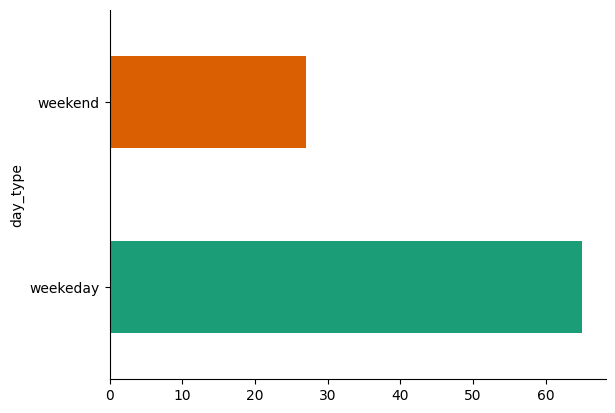

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
dim_date.groupby('day_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

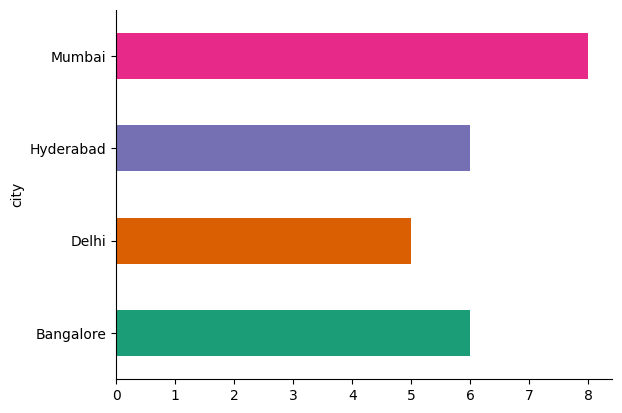

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
dim_hotels.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

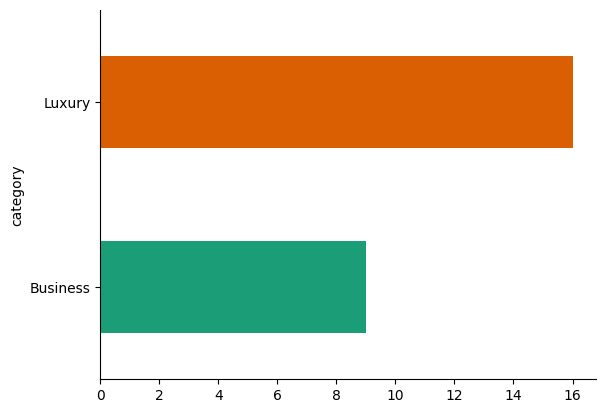

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
dim_hotels.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

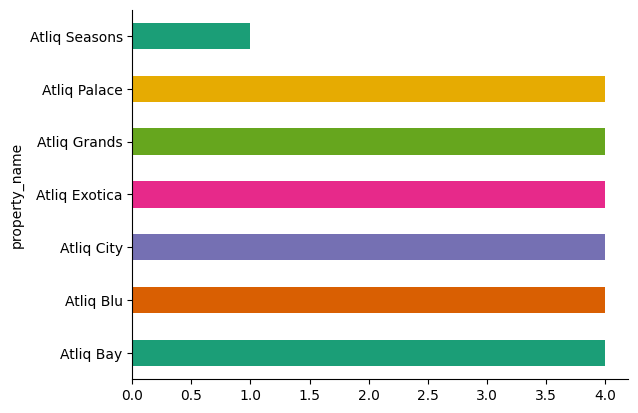

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
dim_hotels.groupby('property_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

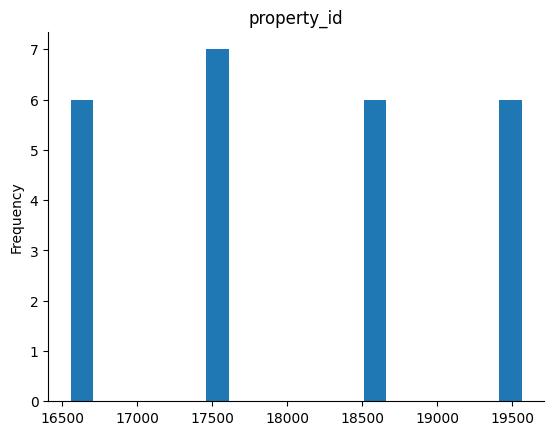

In [19]:
from matplotlib import pyplot as plt
dim_hotels['property_id'].plot(kind='hist', bins=20, title='property_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

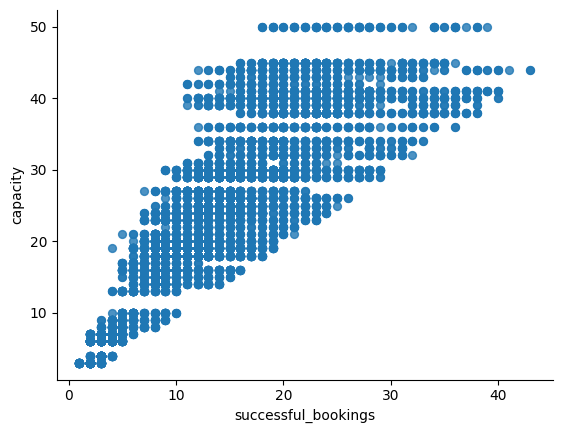

In [20]:
from matplotlib import pyplot as plt
fact_aggregated_bookings.plot(kind='scatter', x='successful_bookings', y='capacity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

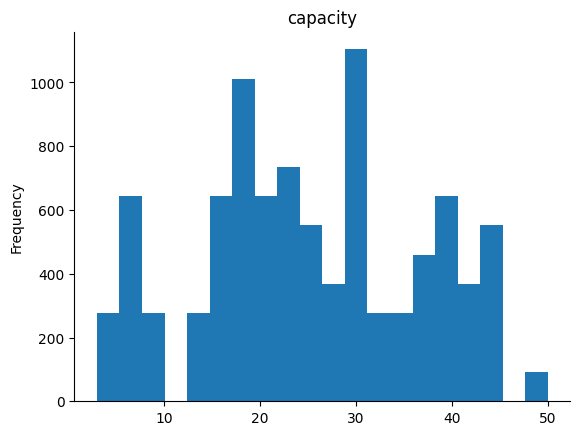

In [21]:
from matplotlib import pyplot as plt
fact_aggregated_bookings['capacity'].plot(kind='hist', bins=20, title='capacity')
plt.gca().spines[['top', 'right',]].set_visible(False)

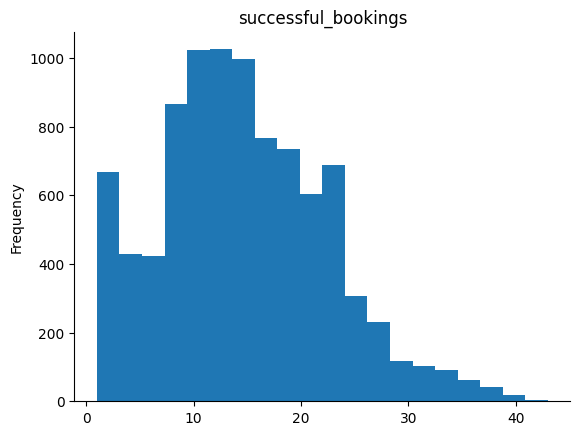

In [22]:
from matplotlib import pyplot as plt
fact_aggregated_bookings['successful_bookings'].plot(kind='hist', bins=20, title='successful_bookings')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-23-899f24e8e33b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fact_aggregated_bookings, x='successful_bookings', y='room_category', inner='box', palette='Dark2')


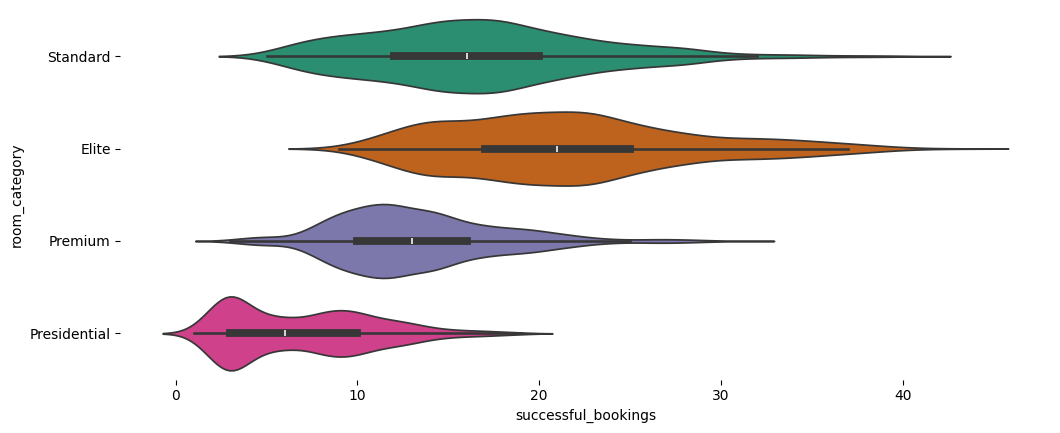

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fact_aggregated_bookings['room_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fact_aggregated_bookings, x='successful_bookings', y='room_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-24-541b56e8424e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fact_aggregated_bookings, x='capacity', y='room_category', inner='box', palette='Dark2')


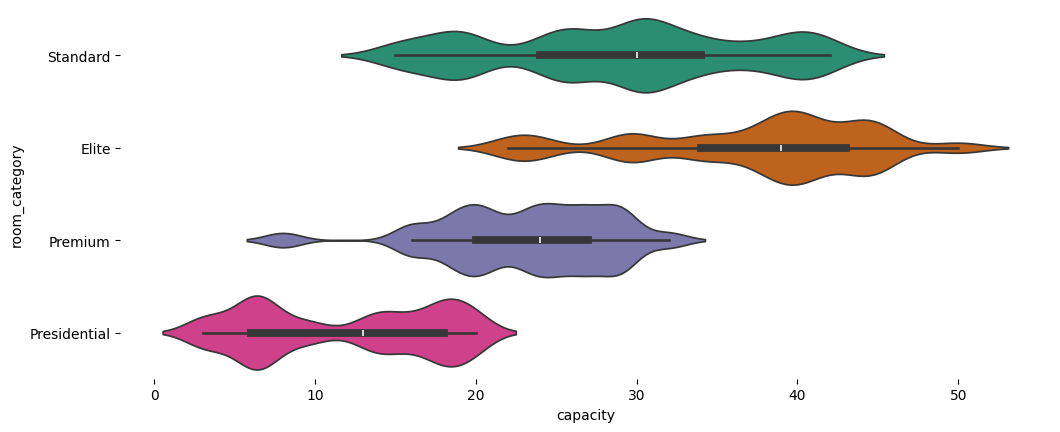

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fact_aggregated_bookings['room_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fact_aggregated_bookings, x='capacity', y='room_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

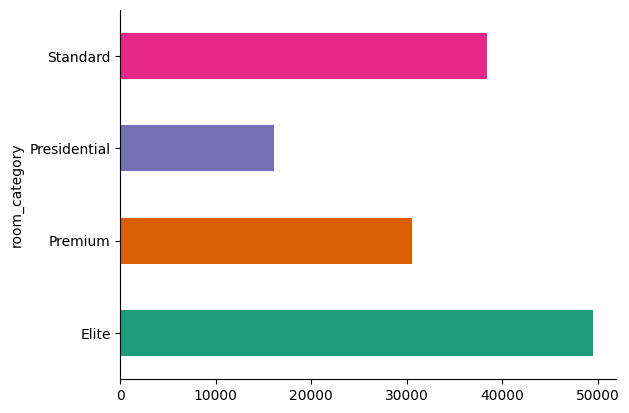

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
fact_bookings.groupby('room_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-26-13b02287e951>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fact_bookings, x='property_id', y='booking_platform', inner='box', palette='Dark2')


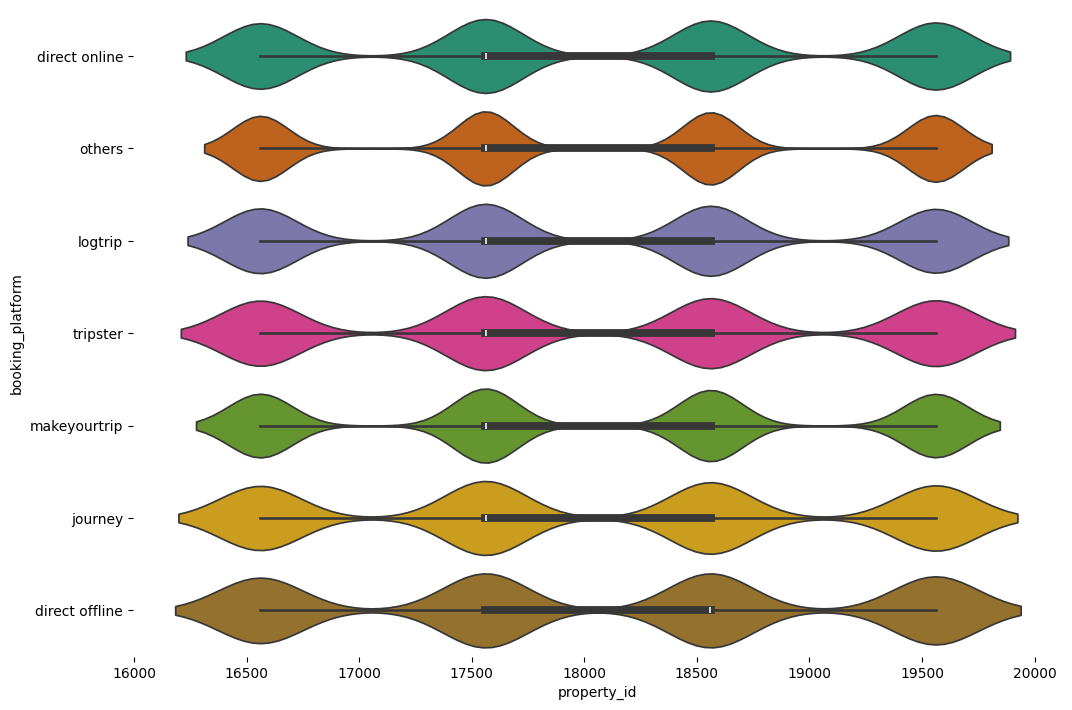

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fact_bookings['booking_platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fact_bookings, x='property_id', y='booking_platform', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-27-d5f8d7e89cf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fact_bookings, x='no_guests', y='room_category', inner='box', palette='Dark2')


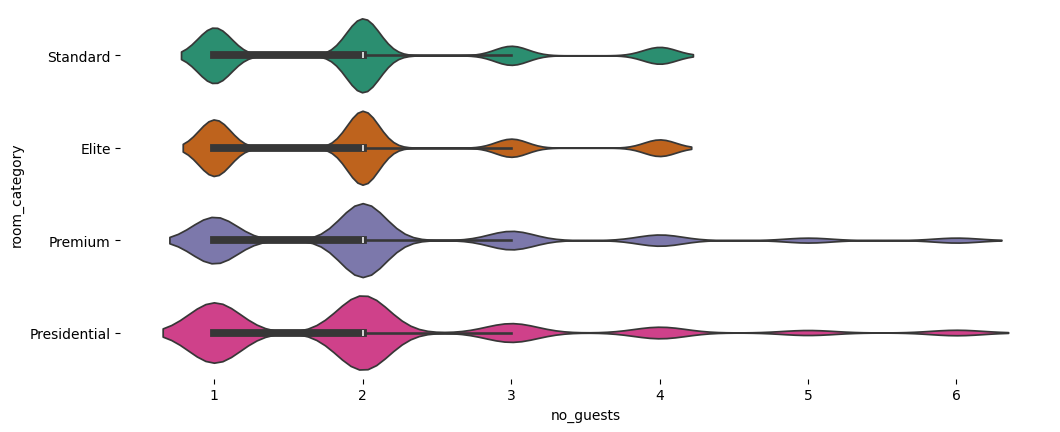

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fact_bookings['room_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fact_bookings, x='no_guests', y='room_category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

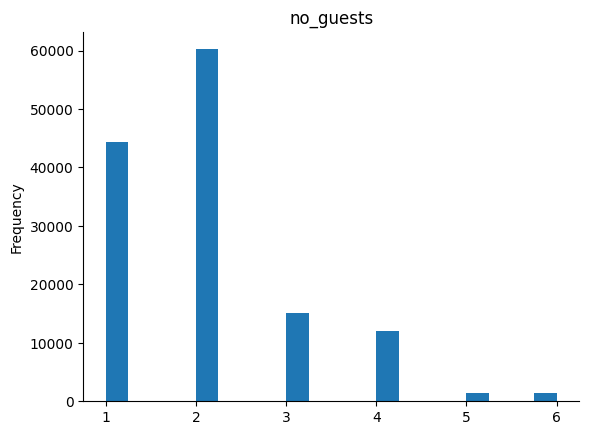

In [28]:
from matplotlib import pyplot as plt
fact_bookings['no_guests'].plot(kind='hist', bins=20, title='no_guests')
plt.gca().spines[['top', 'right',]].set_visible(False)

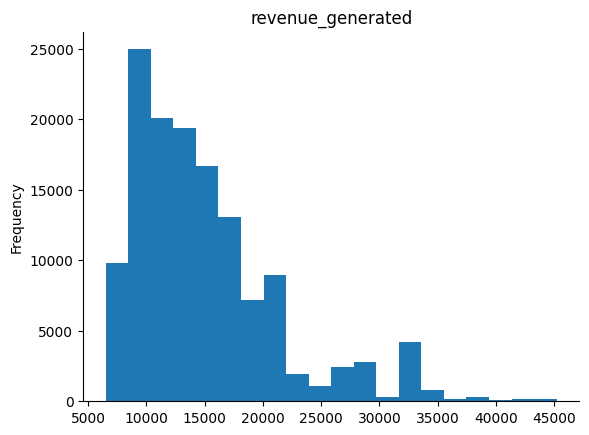

In [29]:
from matplotlib import pyplot as plt
fact_bookings['revenue_generated'].plot(kind='hist', bins=20, title='revenue_generated')
plt.gca().spines[['top', 'right',]].set_visible(False)

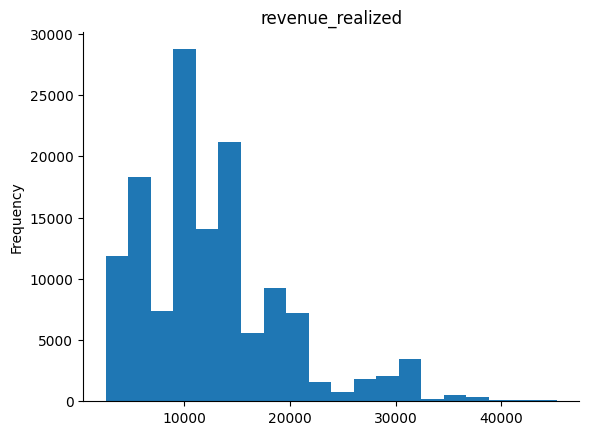

In [30]:
from matplotlib import pyplot as plt
fact_bookings['revenue_realized'].plot(kind='hist', bins=20, title='revenue_realized')
plt.gca().spines[['top', 'right',]].set_visible(False)

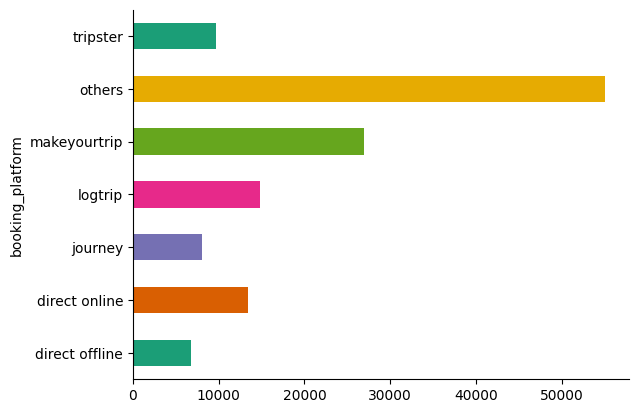

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
fact_bookings.groupby('booking_platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

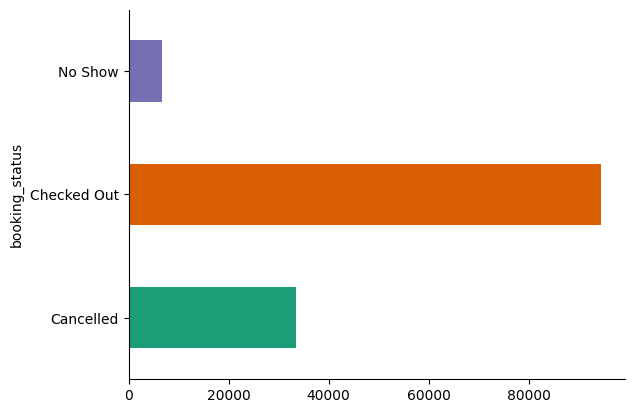

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
fact_bookings.groupby('booking_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
# prompt: summary statistics all tables

# Display summary statistics for all DataFrames
print(dim_date.describe())
print(dim_hotels.describe())
print(dim_rooms.describe())
print(fact_aggregated_bookings.describe())
print(fact_bookings.describe())


                      date                         mmm yy    week no
count                   92                             92  92.000000
mean   2022-06-15 12:00:00  2022-05-31 15:54:46.956521728  25.076087
min    2022-05-01 00:00:00            2022-05-01 00:00:00  19.000000
25%    2022-05-23 18:00:00            2022-05-01 00:00:00  22.000000
50%    2022-06-15 12:00:00            2022-06-01 00:00:00  25.000000
75%    2022-07-08 06:00:00            2022-07-01 00:00:00  28.000000
max    2022-07-31 00:00:00            2022-07-01 00:00:00  32.000000
std                    NaN                            NaN   3.812166
        property_id
count     25.000000
mean   18040.640000
std     1122.436371
min    16558.000000
25%    17558.000000
50%    17564.000000
75%    18563.000000
max    19563.000000
       room_id room_class
count        4          4
unique       4          4
top        RT1   Standard
freq         1          1
        property_id        check_in_date  successful_bookings     cap